In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin


In [2]:
df_anime=pd.read_csv("../datasets/anime-dataset-2023.csv")

In [3]:
df_anime.head(10)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
5,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",...,Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...
6,16,Hachimitsu to Clover,Honey and Clover,ハチミツとクローバー,8.0,"Comedy, Drama, Romance","Yuuta Takemoto, a sophomore at an arts college...",TV,24.0,"Apr 15, 2005 to Sep 27, 2005",...,J.C.Staff,Manga,23 min per ep,PG-13 - Teens 13 or older,589.0,862,4136,81747.0,260166,https://cdn.myanimelist.net/images/anime/1301/...
7,17,Hungry Heart: Wild Striker,UNKNOWN,ハングリーハート Wild Striker,7.55,"Comedy, Slice of Life, Sports",As the younger brother of Japanese soccer star...,TV,52.0,"Sep 11, 2002 to Sep 10, 2003",...,Nippon Animation,Manga,23 min per ep,PG-13 - Teens 13 or older,1551.0,4212,237,12960.0,24172,https://cdn.myanimelist.net/images/anime/12/49...
8,18,Initial D Fourth Stage,UNKNOWN,頭文字〈イニシャル〉D FOURTH STAGE,8.16,"Action, Drama",Takumi Fujiwara finally joins Ryousuke and Kei...,TV,24.0,"Apr 17, 2004 to Feb 18, 2006",...,A.C.G.T.,Manga,27 min per ep,PG-13 - Teens 13 or older,393.0,1273,1237,97878.0,173710,https://cdn.myanimelist.net/images/anime/9/105...
9,19,Monster,Monster,モンスター,8.87,"Drama, Mystery, Suspense","Dr. Kenzou Tenma, an elite neurosurgeon recent...",TV,74.0,"Apr 7, 2004 to Sep 28, 2005",...,Madhouse,Manga,24 min per ep,R+ - Mild Nudity,26.0,142,47235,368569.0,1013100,https://cdn.myanimelist.net/images/anime/10/18...


In [4]:
df_anime.isna().sum()

anime_id        0
Name            0
English name    0
Other name      0
Score           0
Genres          0
Synopsis        0
Type            0
Episodes        0
Aired           0
Premiered       0
Status          0
Producers       0
Licensors       0
Studios         0
Source          0
Duration        0
Rating          0
Rank            0
Popularity      0
Favorites       0
Scored By       0
Members         0
Image URL       0
dtype: int64

In [5]:
df_anime.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL'],
      dtype='object')

In [6]:
df_anime["Studios"].value_counts()

Studios
UNKNOWN                            10526
Toei Animation                       834
Sunrise                              532
J.C.Staff                            385
Shanghai Animation Film Studio       335
                                   ...  
Ordet, Encourage Films                 1
Hoods Entertainment, Felix Film        1
Kaeruotoko Shokai                      1
MooGoo, Studio Ranmaru                 1
Youku                                  1
Name: count, Length: 1547, dtype: int64

In [7]:
df_anime["Aired"].value_counts()

Aired
Not available                   915
2012 to ?                        76
2005                             74
2011 to ?                        74
2010 to ?                        72
                               ... 
Mar 3, 1989                       1
May 21, 2006                      1
Oct 2, 1987 to Sep 20, 1988       1
Dec 22, 2011 to Dec 28, 2012      1
Apr 23, 2022                      1
Name: count, Length: 15213, dtype: int64

In [8]:
df_anime["Premiered"].value_counts()

Premiered
UNKNOWN        19399
spring 2017       88
fall 2016         83
spring 2018       81
spring 2016       78
               ...  
summer 1993        1
summer 1974        1
summer 1991        1
spring 1961        1
summer 2025        1
Name: count, Length: 244, dtype: int64

In [9]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [10]:
df_anime.shape

(24905, 24)

In [11]:
df_anime["Score"].values

array(['8.75', '8.38', '8.22', ..., 'UNKNOWN', 'UNKNOWN', 'UNKNOWN'],
      dtype=object)

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class NumericColumnTransformer(BaseEstimator, TransformerMixin):
    """
    A scikit-learn transformer for converting specified columns to numeric values.
    
    Parameters:
    -----------
    columns : list or None
        List of column names to convert to numeric
    fill_na : optional
        Value to fill NaN values with after conversion (None means do not fill)
    dtype : type, optional
        Data type to convert columns to after conversion (None means do not convert type)
    """
    
    def __init__(self, columns=None, fill_na=None, dtype=None):
        self.columns = columns
        self.fill_na = fill_na
        self.dtype = dtype
    
    def fit(self, X, y=None):
        """Fit method (no actual fitting needed for this transformer)"""
        return self
    
    def transform(self, X):
        """Transform method to convert columns to numeric"""
        X_result = X.copy()
        
        # If no columns specified, convert all columns
        columns_to_convert = self.columns if self.columns is not None else X.columns
        
        for column in columns_to_convert:
            if column in X.columns:
                X_result[column] = pd.to_numeric(X_result[column], errors='coerce')
                
                if self.fill_na is not None:
                    X_result[column] = X_result[column].fillna(self.fill_na)
                    
                if self.dtype is not None:
                    X_result[column] = X_result[column].astype(self.dtype)
        
        return X_result

In [13]:
# Create transformer for Score column (no filling or type conversion)
score_transformer = NumericColumnTransformer(columns=['Score'])
df_anime = score_transformer.fit_transform(df_anime)

# Create transformer for multiple columns with NaN filling and integer conversion
numeric_transformer = NumericColumnTransformer(
    columns=['Episodes', 'Rank', 'Popularity', 'Favorites', 'Members'],
    fill_na=0,
    dtype=int
)
df_anime = numeric_transformer.fit_transform(df_anime)



df_anime = numeric_transformer.fit_transform(df_anime)

In [14]:
df_anime.isna().sum()

anime_id           0
Name               0
English name       0
Other name         0
Score           9213
Genres             0
Synopsis           0
Type               0
Episodes           0
Aired              0
Premiered          0
Status             0
Producers          0
Licensors          0
Studios            0
Source             0
Duration           0
Rating             0
Rank               0
Popularity         0
Favorites          0
Scored By          0
Members            0
Image URL          0
dtype: int64

In [15]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      24905 non-null  int64  
 1   Name          24905 non-null  object 
 2   English name  24905 non-null  object 
 3   Other name    24905 non-null  object 
 4   Score         15692 non-null  float64
 5   Genres        24905 non-null  object 
 6   Synopsis      24905 non-null  object 
 7   Type          24905 non-null  object 
 8   Episodes      24905 non-null  int32  
 9   Aired         24905 non-null  object 
 10  Premiered     24905 non-null  object 
 11  Status        24905 non-null  object 
 12  Producers     24905 non-null  object 
 13  Licensors     24905 non-null  object 
 14  Studios       24905 non-null  object 
 15  Source        24905 non-null  object 
 16  Duration      24905 non-null  object 
 17  Rating        24905 non-null  object 
 18  Rank          24905 non-nu

# Exploring Categorical Values:

In [16]:
df_anime["Genres"].values

array(['Action, Award Winning, Sci-Fi', 'Action, Sci-Fi',
       'Action, Adventure, Sci-Fi', ...,
       'Action, Adventure, Fantasy, Sci-Fi', 'UNKNOWN', 'UNKNOWN'],
      dtype=object)

In [17]:
# Split the "Genres" column by commas, flatten the lists, and get unique values
unique_genres = set(genre.strip() for genres in df_anime["Genres"].dropna() for genre in genres.split(','))

# Display the unique genres
print(unique_genres)
print(len(unique_genres))

{'UNKNOWN', 'Gourmet', 'Comedy', 'Sci-Fi', 'Supernatural', 'Slice of Life', 'Ecchi', 'Action', 'Erotica', 'Suspense', 'Sports', 'Boys Love', 'Girls Love', 'Avant Garde', 'Romance', 'Hentai', 'Adventure', 'Drama', 'Fantasy', 'Mystery', 'Award Winning', 'Horror'}
22


In [18]:
df_anime.isna().sum()

anime_id           0
Name               0
English name       0
Other name         0
Score           9213
Genres             0
Synopsis           0
Type               0
Episodes           0
Aired              0
Premiered          0
Status             0
Producers          0
Licensors          0
Studios            0
Source             0
Duration           0
Rating             0
Rank               0
Popularity         0
Favorites          0
Scored By          0
Members            0
Image URL          0
dtype: int64

In [19]:
class GenreOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.unique_genres = None

    def fit(self, X, y=None):
        # Extract unique genres from the 'Genres' column
        all_genres = X['Genres'].str.split(', ').explode().unique()
        self.unique_genres = sorted(all_genres)  # Sort for consistent column order
        return self

    def transform(self, X):
        # Create one-hot encoded columns with prefix "Genre_"
        genre_columns = {f"Genre_{genre}": [] for genre in self.unique_genres}
        
        for genres in X['Genres']:
            genre_set = set(genres.split(', '))
            for genre in self.unique_genres:
                genre_columns[f"Genre_{genre}"].append(1 if genre in genre_set else 0)
        
        # Convert to DataFrame
        genre_df = pd.DataFrame(genre_columns)
        
        # Concatenate original dataframe with one-hot encoded columns
        X_encoded = pd.concat([X.reset_index(drop=True), genre_df], axis=1)
        return X_encoded

# Example usage
data = {
    "anime_id": [1, 2, 3],
    "Name": ["Cowboy Bebop", "Trigun", "Monster"],
    "Genres": ["Action, Sci-Fi", "Action, Adventure, Sci-Fi", "Drama, Mystery, Suspense"]
}

df = pd.DataFrame(data)

# Initialize and apply the transformer
encoder = GenreOneHotEncoder()
encoder.fit(df_anime)
df_encoded = encoder.transform(df_anime)






In [20]:
df_encoded.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Genre_Hentai,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Slice of Life,Genre_Sports,Genre_Supernatural,Genre_Suspense,Genre_UNKNOWN
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,0,0,0,0,1,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1,"Sep 1, 2001",...,0,0,0,0,1,0,0,0,0,0
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,0,0,0,0,1,0,0,0,0,0
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26,"Jul 3, 2002 to Dec 25, 2002",...,0,0,1,0,0,0,0,1,0,0
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,0,0,0,0,0,0,0,1,0,0


In [21]:
df_encoded.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL',
       'Genre_Action', 'Genre_Adventure', 'Genre_Avant Garde',
       'Genre_Award Winning', 'Genre_Boys Love', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Ecchi', 'Genre_Erotica', 'Genre_Fantasy', 'Genre_Girls Love',
       'Genre_Gourmet', 'Genre_Hentai', 'Genre_Horror', 'Genre_Mystery',
       'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Slice of Life', 'Genre_Sports',
       'Genre_Supernatural', 'Genre_Suspense', 'Genre_UNKNOWN'],
      dtype='object')

In [22]:
df_encoded.isna().sum()

anime_id                  0
Name                      0
English name              0
Other name                0
Score                  9213
Genres                    0
Synopsis                  0
Type                      0
Episodes                  0
Aired                     0
Premiered                 0
Status                    0
Producers                 0
Licensors                 0
Studios                   0
Source                    0
Duration                  0
Rating                    0
Rank                      0
Popularity                0
Favorites                 0
Scored By                 0
Members                   0
Image URL                 0
Genre_Action              0
Genre_Adventure           0
Genre_Avant Garde         0
Genre_Award Winning       0
Genre_Boys Love           0
Genre_Comedy              0
Genre_Drama               0
Genre_Ecchi               0
Genre_Erotica             0
Genre_Fantasy             0
Genre_Girls Love          0
Genre_Gourmet       

In [23]:
df_encoded[["Genres", "Genre_Action", "Genre_Adventure", "Genre_Avant Garde",
       "Genre_Award Winning", "Genre_Boys Love", "Genre_Comedy", "Genre_Drama",
       "Genre_Ecchi", "Genre_Erotica", "Genre_Fantasy", "Genre_Girls Love",
       "Genre_Gourmet", "Genre_Hentai", "Genre_Horror", "Genre_Mystery",
       "Genre_Romance", "Genre_Sci-Fi", "Genre_Slice of Life", "Genre_Sports",
       "Genre_Supernatural", "Genre_Suspense", "Genre_UNKNOWN"]].values

array([['Action, Award Winning, Sci-Fi', 1, 0, ..., 0, 0, 0],
       ['Action, Sci-Fi', 1, 0, ..., 0, 0, 0],
       ['Action, Adventure, Sci-Fi', 1, 1, ..., 0, 0, 0],
       ...,
       ['Action, Adventure, Fantasy, Sci-Fi', 1, 1, ..., 0, 0, 0],
       ['UNKNOWN', 0, 0, ..., 0, 0, 1],
       ['UNKNOWN', 0, 0, ..., 0, 0, 1]], dtype=object)

In [24]:
df_anime["Type"].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'UNKNOWN'],
      dtype=object)

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
one_hot_encode_Type = OneHotEncoder(sparse_output=False, dtype=int)

# Fit and transform the "Type" column
type_encoded = one_hot_encode_Type.fit_transform(df_encoded[["Type"]])

# Create a DataFrame for the encoded columns
type_encoded_df = pd.DataFrame(type_encoded, columns=[f"Type_{cat}" for cat in one_hot_encode_Type.categories_[0]])

# Concatenate the original DataFrame with the encoded columns
df_encoded = pd.concat([df_encoded.reset_index(drop=True), type_encoded_df.reset_index(drop=True)], axis=1)

# Drop the "Type" column
df_encoded.drop(columns=["Type"], inplace=True)

# Display the updated columns
df_encoded.columns


Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Episodes', 'Aired', 'Premiered', 'Status', 'Producers',
       'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Rank',
       'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL',
       'Genre_Action', 'Genre_Adventure', 'Genre_Avant Garde',
       'Genre_Award Winning', 'Genre_Boys Love', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Ecchi', 'Genre_Erotica', 'Genre_Fantasy', 'Genre_Girls Love',
       'Genre_Gourmet', 'Genre_Hentai', 'Genre_Horror', 'Genre_Mystery',
       'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Slice of Life', 'Genre_Sports',
       'Genre_Supernatural', 'Genre_Suspense', 'Genre_UNKNOWN', 'Type_Movie',
       'Type_Music', 'Type_ONA', 'Type_OVA', 'Type_Special', 'Type_TV',
       'Type_UNKNOWN'],
      dtype='object')

In [26]:
df_encoded["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'UNKNOWN'], dtype=object)

In [27]:
df_encoded["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'UNKNOWN'], dtype=object)

In [28]:
df_encoded=df_encoded[df_encoded["Rating"]!="UNKNOWN"]
df_encoded.shape

(24236, 52)

In [29]:
df_encoded["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai'],
      dtype=object)

In [30]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
one_hot_encode_Studios = OneHotEncoder(sparse_output=False, dtype=int)

# Fit and transform the "Type" column
type_encoded = one_hot_encode_Type.fit_transform(df_encoded[["Studios"]])

# Create a DataFrame for the encoded columns
type_encoded_df = pd.DataFrame(type_encoded, columns=[f"Studio_{cat}" for cat in one_hot_encode_Type.categories_[0]])

# Concatenate the original DataFrame with the encoded columns
df_encoded = pd.concat([df_encoded.reset_index(drop=True), type_encoded_df.reset_index(drop=True)], axis=1)

# Display the updated columns
df_encoded.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Episodes', 'Aired', 'Premiered',
       ...
       'Studio_pH Studio', 'Studio_pH Studio, D & D Pictures',
       'Studio_pH Studio, Noovo', 'Studio_production doA',
       'Studio_studio MOTHER', 'Studio_studio YOG', 'Studio_trenova',
       'Studio_ufotable',
       'Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive',
       'Studio_ufotable, feel., Studio Flag'],
      dtype='object', length=1570)

In [31]:
df_encoded.shape

(24236, 1570)

In [32]:
df_encoded.head(10)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Episodes,Aired,Premiered,...,Studio_pH Studio,"Studio_pH Studio, D & D Pictures","Studio_pH Studio, Noovo",Studio_production doA,Studio_studio MOTHER,Studio_studio YOG,Studio_trenova,Studio_ufotable,"Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive","Studio_ufotable, feel., Studio Flag"
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",26,"Apr 3, 1998 to Apr 24, 1999",spring 1998,...,0,0,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",1,"Sep 1, 2001",UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",26,"Apr 1, 1998 to Sep 30, 1998",spring 1998,...,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,26,"Jul 3, 2002 to Dec 25, 2002",summer 2002,...,0,0,0,0,0,0,0,0,0,0
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,52,"Sep 30, 2004 to Sep 29, 2005",fall 2004,...,0,0,0,0,0,0,0,0,0,0
5,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",145,"Apr 6, 2005 to Mar 19, 2008",spring 2005,...,0,0,0,0,0,0,0,0,0,0
6,16,Hachimitsu to Clover,Honey and Clover,ハチミツとクローバー,8.00,"Comedy, Drama, Romance","Yuuta Takemoto, a sophomore at an arts college...",24,"Apr 15, 2005 to Sep 27, 2005",spring 2005,...,0,0,0,0,0,0,0,0,0,0
7,17,Hungry Heart: Wild Striker,UNKNOWN,ハングリーハート Wild Striker,7.55,"Comedy, Slice of Life, Sports",As the younger brother of Japanese soccer star...,52,"Sep 11, 2002 to Sep 10, 2003",fall 2002,...,0,0,0,0,0,0,0,0,0,0
8,18,Initial D Fourth Stage,UNKNOWN,頭文字〈イニシャル〉D FOURTH STAGE,8.16,"Action, Drama",Takumi Fujiwara finally joins Ryousuke and Kei...,24,"Apr 17, 2004 to Feb 18, 2006",spring 2004,...,0,0,0,0,0,0,0,0,0,0
9,19,Monster,Monster,モンスター,8.87,"Drama, Mystery, Suspense","Dr. Kenzou Tenma, an elite neurosurgeon recent...",74,"Apr 7, 2004 to Sep 28, 2005",spring 2004,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_encoded["Aired"].values

array(['Apr 3, 1998 to Apr 24, 1999', 'Sep 1, 2001',
       'Apr 1, 1998 to Sep 30, 1998', ..., 'Jul 19, 2023 to ?',
       'Apr 23, 2022', 'Sep 5, 2022'], dtype=object)

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import re

class ReleaseYearExtractor(BaseEstimator, TransformerMixin):
    """
    Transformer that extracts release years from 'Aired' and 'Premiered' columns
    and creates a combined 'Release_Year' column.
    
    Parameters:
    -----------
    aired_col : str, default='Aired'
        Name of the column containing aired dates
    premiered_col : str, default='Premiered'
        Name of the column containing premiered season info
    target_col : str, default='Release_Year'
        Name of the output column for the extracted year
    drop_intermediate : bool, default=True
        Whether to drop intermediate columns created during transformation
    """
    
    def __init__(self, aired_col='Aired', premiered_col='Premiered',
                 target_col='Release_Year', drop_intermediate=True):
        self.aired_col = aired_col
        self.premiered_col = premiered_col
        self.target_col = target_col
        self.drop_intermediate = drop_intermediate
    
    def fit(self, X, y=None):
        """Fit method (no actual fitting required)"""
        return self
    
    def transform(self, X):
        """
        Extract years from the specified columns and combine them.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            The DataFrame to transform
            
        Returns:
        --------
        pandas.DataFrame
            The transformed DataFrame with the new year column
        """
        # Make a copy to avoid modifying the original
        X_result = X.copy()
        
        # Extract year from Aired column
        aired_year_col = f"{self.target_col}_from_Aired"
        X_result[aired_year_col] = pd.to_datetime(
            X_result[self.aired_col].str.split(" to ").str[0], 
            errors='coerce'
        ).dt.year
        
        # Extract year from Premiered column using regex
        premiered_year_col = f"{self.target_col}_from_Premiered"
        X_result[premiered_year_col] = X_result[self.premiered_col].str.extract(
            r'(\d{4})'
        ).astype(float)
        
        # Combine years, prioritizing Aired
        X_result[self.target_col] = X_result[aired_year_col].fillna(X_result[premiered_year_col])
        
        # Optionally drop intermediate columns
        if self.drop_intermediate:
            X_result = X_result.drop(columns=[aired_year_col, premiered_year_col])
        
        return X_result

In [35]:
# Create the transformer
release_year_transformer = ReleaseYearExtractor()

# Apply the transformation
df_encoded = release_year_transformer.fit_transform(df_encoded)

# Check the results
print(df_encoded[["Aired", "Premiered", "Release_Year"]].head())

                          Aired    Premiered  Release_Year
0   Apr 3, 1998 to Apr 24, 1999  spring 1998        1998.0
1                   Sep 1, 2001      UNKNOWN        2001.0
2   Apr 1, 1998 to Sep 30, 1998  spring 1998        1998.0
3   Jul 3, 2002 to Dec 25, 2002  summer 2002        2002.0
4  Sep 30, 2004 to Sep 29, 2005    fall 2004        2004.0


In [36]:
df_encoded["Release_Year"].isna().sum()

4388

In [37]:
df_encoded.tail(10)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Episodes,Aired,Premiered,...,"Studio_pH Studio, D & D Pictures","Studio_pH Studio, Noovo",Studio_production doA,Studio_studio MOTHER,Studio_studio YOG,Studio_trenova,Studio_ufotable,"Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive","Studio_ufotable, feel., Studio Flag",Release_Year
24226,55723,The Forgotten Princess Just Wants Peace,UNKNOWN,잊혀진 황녀는 평화롭게 살고 싶어,NaN,"Fantasy, Romance",I'm the daughter of a Duke?!\nWhile locked up ...,0,"May 31, 2023 to ?",UNKNOWN,...,0,0,0,0,0,0,0,0,0,2023.0
24227,55726,"Die, Please!",UNKNOWN,부탁이니 죽어주라,NaN,"Fantasy, Romance",I just want to tell him how I feel!\nMina has ...,0,"May 31, 2023 to ?",UNKNOWN,...,0,0,0,0,0,0,0,0,0,2023.0
24228,55728,Wo Mengjian ni Mengjian wo,A Dream Where You Dreamt of Me,我夢見你夢見我,NaN,Drama,Music video for the song Wo Mengjian ni Mengji...,1,"Jun 22, 2017",UNKNOWN,...,0,0,0,0,0,0,0,0,0,2017.0
24229,55729,Thailand,UNKNOWN,Thailand,NaN,Avant Garde,Music video for the song Thailand by Oh Shu.,1,"Jul 3, 2014",UNKNOWN,...,0,0,0,0,0,0,0,0,0,2014.0
24230,55730,Energy,UNKNOWN,Energy,NaN,Avant Garde,Music video for the song Energy by SLEEQ (Kim ...,1,"Feb 11, 2015",UNKNOWN,...,0,0,0,0,0,0,0,0,0,2015.0
24231,55731,Wu Nao Monu,UNKNOWN,无脑魔女,NaN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,15,"Jul 4, 2023 to ?",UNKNOWN,...,0,0,0,0,0,0,0,0,0,2023.0
24232,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,NaN,"Action, Adventure, Fantasy",No description available for this anime.,18,"Jul 27, 2023 to ?",UNKNOWN,...,0,0,0,0,0,0,0,0,0,2023.0
24233,55733,Di Yi Xulie,The First Order,第一序列,NaN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,16,"Jul 19, 2023 to ?",UNKNOWN,...,0,0,0,0,0,0,0,0,0,2023.0
24234,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,NaN,UNKNOWN,A music video for the song Bokura no Saishuu S...,1,"Apr 23, 2022",UNKNOWN,...,0,0,0,0,0,0,0,0,0,2022.0
24235,55735,Shijuuku Nichi,UNKNOWN,四十九日,NaN,UNKNOWN,A music video for the song Shijuuku Nichi by S...,1,"Sep 5, 2022",UNKNOWN,...,0,0,0,0,0,0,0,0,0,2022.0


In [38]:
df_encoded.isna().sum()

anime_id                                                                                       0
Name                                                                                           0
English name                                                                                   0
Other name                                                                                     0
Score                                                                                       8638
                                                                                            ... 
Studio_trenova                                                                                 0
Studio_ufotable                                                                                0
Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive       0
Studio_ufotable, feel., Studio Flag                                                            0
Release_Year                  

In [39]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236 entries, 0 to 24235
Columns: 1571 entries, anime_id to Release_Year
dtypes: float64(2), int32(1530), int64(23), object(16)
memory usage: 149.0+ MB


In [40]:
# from numpy import nan


# df_encoded=df_encoded[df_encoded["Release_Year"]!=nan]

In [41]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236 entries, 0 to 24235
Columns: 1571 entries, anime_id to Release_Year
dtypes: float64(2), int32(1530), int64(23), object(16)
memory usage: 149.0+ MB


In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class DataFilterTransformer(BaseEstimator, TransformerMixin):
    """
    A scikit-learn transformer that filters out rows from DataFrame based on specified conditions.
    
    Parameters:
    -----------
    column : str
        Column name to filter on
    exclude_nan : bool, default=True
        Whether to exclude NaN values
    exclude_values : list or None, default=None
        List of specific values to exclude
    """
    
    def __init__(self, column, exclude_nan=True, exclude_values=None):
        self.column = column
        self.exclude_nan = exclude_nan
        self.exclude_values = exclude_values if exclude_values is not None else []
    
    def fit(self, X, y=None):
        """Fit method (no actual fitting needed)"""
        return self
    
    def transform(self, X):
        """
        Filter rows based on specified conditions.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            DataFrame to filter
            
        Returns:
        --------
        pandas.DataFrame
            Filtered DataFrame
        """
        X_filtered = X.copy()
        
        # Filter out NaN values if specified
        if self.exclude_nan:
            X_filtered = X_filtered[X_filtered[self.column].notna()]
        
        # Filter out specific values
        for value in self.exclude_values:
            X_filtered = X_filtered[X_filtered[self.column] != value]
            
        return X_filtered

In [43]:
# Create the transformer to filter out NaN and "UNKNOWN" values from "Release_Year" column
filter_transformer = DataFilterTransformer(
    column="Release_Year",
    exclude_nan=True,
    exclude_values=["UNKNOWN"]
)

# Apply the filter
df_filtered = filter_transformer.fit_transform(df_encoded)

# Check results
print(f"Original shape: {df_encoded.shape}")
print(f"Filtered shape: {df_filtered.shape}")
df_encoded=df_filtered.copy()

Original shape: (24236, 1571)
Filtered shape: (19848, 1571)


In [44]:
# df_encoded = df_encoded[df_encoded["Release_Year"] != "UNKNOWN"]

In [45]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19848 entries, 0 to 24235
Columns: 1571 entries, anime_id to Release_Year
dtypes: float64(2), int32(1530), int64(23), object(16)
memory usage: 122.2+ MB


In [46]:
df_encoded.to_csv("Final_Anime_Dataset.csv", index=False)

### making data for user where values are averaged for each genre and only one row per user is there 

In [47]:
user_data_temp_final_path = "user_data_temp_final.csv"
OneUser_multiAnime_df = pd.read_csv(user_data_temp_final_path)

In [48]:
# OneUser_multiAnime_df.drop(columns=['Unnamed: 0'],inplace=True)
OneUser_multiAnime_df.head(10)
OneUser_multiAnime_df.columns

Index(['Unnamed: 0', 'Username', 'Gender', 'Mean Score', 'Completed',
       'Birth_Year', 'user_id', 'anime_id', 'Anime Title', 'rating'],
      dtype='object')

In [49]:
df_encoded.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Episodes', 'Aired', 'Premiered',
       ...
       'Studio_pH Studio, D & D Pictures', 'Studio_pH Studio, Noovo',
       'Studio_production doA', 'Studio_studio MOTHER', 'Studio_studio YOG',
       'Studio_trenova', 'Studio_ufotable',
       'Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive',
       'Studio_ufotable, feel., Studio Flag', 'Release_Year'],
      dtype='object', length=1571)

In [50]:


# Note : remove Genre_UNKNOWN : simply adds noise 
# remove UNKNOWN 

# transformer used 
"""
class GenreOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.unique_genres = None

    def fit(self, X, y=None):
        # Extract unique genres from the 'Genres' column
        all_genres = X['Genres'].str.split(', ').explode().unique()
        self.unique_genres = sorted(all_genres)  # Sort for consistent column order
        return self

    def transform(self, X):
        # Create one-hot encoded columns with prefix "Genre_"
        genre_columns = {f"Genre_{genre}": [] for genre in self.unique_genres}
        
        for genres in X['Genres']:
            genre_set = set(genres.split(', '))
            for genre in self.unique_genres:
                genre_columns[f"Genre_{genre}"].append(1 if genre in genre_set else 0)
        
        # Convert to DataFrame
        genre_df = pd.DataFrame(genre_columns)
        
        # Concatenate original dataframe with one-hot encoded columns
        X_encoded = pd.concat([X.reset_index(drop=True), genre_df], axis=1)
        return X_encoded
"""


'\nclass GenreOneHotEncoder(BaseEstimator, TransformerMixin):\n    def __init__(self):\n        self.unique_genres = None\n\n    def fit(self, X, y=None):\n        # Extract unique genres from the \'Genres\' column\n        all_genres = X[\'Genres\'].str.split(\', \').explode().unique()\n        self.unique_genres = sorted(all_genres)  # Sort for consistent column order\n        return self\n\n    def transform(self, X):\n        # Create one-hot encoded columns with prefix "Genre_"\n        genre_columns = {f"Genre_{genre}": [] for genre in self.unique_genres}\n        \n        for genres in X[\'Genres\']:\n            genre_set = set(genres.split(\', \'))\n            for genre in self.unique_genres:\n                genre_columns[f"Genre_{genre}"].append(1 if genre in genre_set else 0)\n        \n        # Convert to DataFrame\n        genre_df = pd.DataFrame(genre_columns)\n        \n        # Concatenate original dataframe with one-hot encoded columns\n        X_encoded = pd.conc

In [51]:
# merged_df = pd.merge(
#     OneUser_multiAnime_df,
#     df_anime_genre,
#     on='anime_id',
#     how='inner'
# )


In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class DataFrameMergerTransformer(BaseEstimator, TransformerMixin):
    """
    A scikit-learn transformer that merges a DataFrame with another reference DataFrame.
    
    Parameters:
    -----------
    df_encoded : pandas.DataFrame
        The main DataFrame containing all columns
    on : str or list of str
        Column(s) to join on
    how : str, default='inner'
        Type of merge to be performed ('inner', 'left', 'right', 'outer')
    suffixes : tuple of str, default=('_x', '_y')
        Suffixes to use for overlapping columns
    reset_index : bool, default=True
        Whether to reset the index of the resulting merged DataFrame
    drop_on_duplicate : bool or list, default=False
        Whether to drop duplicate columns after merging (except the join key)
        If list, specifies the columns to drop
    """
    
    def __init__(self, df_encoded, on, how='inner', suffixes=('_x', '_y'), 
                 reset_index=True, drop_on_duplicate=False):
        self.df_encoded = df_encoded
        self.on = on
        self.how = how
        self.suffixes = suffixes
        self.reset_index = reset_index
        self.drop_on_duplicate = drop_on_duplicate
    
    def fit(self, X, y=None):
        """Fit method (no actual fitting needed)"""
        return self
    
    def transform(self, X):
        """
        Merge the input DataFrame with the reference DataFrame.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            DataFrame to be merged with the reference DataFrame
            
        Returns:
        --------
        pandas.DataFrame
            Merged DataFrame
        """
        # Extract the required columns to create df_anime_genre
        df_anime_genre = self.df_encoded[[
            'anime_id', 'Genres', 'Genre_Action', 'Genre_Adventure', 'Genre_Avant Garde',
            'Genre_Award Winning', 'Genre_Boys Love', 'Genre_Comedy', 'Genre_Drama',
            'Genre_Ecchi', 'Genre_Erotica', 'Genre_Fantasy', 'Genre_Girls Love',
            'Genre_Gourmet', 'Genre_Hentai', 'Genre_Horror', 'Genre_Mystery',
            'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Slice of Life', 'Genre_Sports',
            'Genre_Supernatural', 'Genre_Suspense'
        ]]
        
        # Perform the merge operation
        merged_df = pd.merge(
            X, 
            df_anime_genre,
            on=self.on,
            how=self.how,
            suffixes=self.suffixes
        )
        
        # Reset index if specified
        if self.reset_index:
            merged_df = merged_df.reset_index(drop=True)
        
        # Handle duplicate columns
        if self.drop_on_duplicate:
            if isinstance(self.drop_on_duplicate, list):
                # Drop specific columns
                merged_df = merged_df.drop(columns=self.drop_on_duplicate, errors='ignore')
            else:
                # Identify and drop columns with '_y' suffix (from reference_df)
                duplicate_cols = [col for col in merged_df.columns if col.endswith(self.suffixes[1])]
                merged_df = merged_df.drop(columns=duplicate_cols, errors='ignore')
        
        return merged_df

In [53]:
# Creating the transformer
merger_transformer = DataFrameMergerTransformer(
    df_encoded,  # Your reference DataFrame with genre columns
    on='anime_id',                # Join on anime_id
    how='inner',                  # Inner join
    drop_on_duplicate=True        # Automatically drop duplicate columns
)

# Applying the transformation
merged_df = merger_transformer.fit_transform(OneUser_multiAnime_df)

# Review the results
print(f"Input shape: {OneUser_multiAnime_df.shape}")

print(f"Merged shape: {merged_df.shape}")
merged_df.head()

Input shape: (8467079, 10)
Merged shape: (8445152, 32)


,Unnamed: 0,Username,Gender,Mean Score,Completed,Birth_Year,user_id,anime_id,Anime Title,rating,...,Genre_Gourmet,Genre_Hentai,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Slice of Life,Genre_Sports,Genre_Supernatural,Genre_Suspense
0,0,Xinil,Male,7.37,233.0,1985,1,21,One Piece,9,...,0,0,0,0,0,0,0,0,0,0
1,1,Xinil,Male,7.37,233.0,1985,1,48,.hack//Sign,7,...,0,0,0,1,0,0,0,0,0,0
2,2,Xinil,Male,7.37,233.0,1985,1,320,A Kite,5,...,0,1,0,0,0,0,0,0,0,0
3,3,Xinil,Male,7.37,233.0,1985,1,49,Aa! Megami-sama!,8,...,0,0,0,0,1,0,0,0,1,0
4,4,Xinil,Male,7.37,233.0,1985,1,304,Aa! Megami-sama! Movie,8,...,0,0,0,0,1,0,0,0,1,0


In [54]:
merged_df.head(5)

,Unnamed: 0,Username,Gender,Mean Score,Completed,Birth_Year,user_id,anime_id,Anime Title,rating,...,Genre_Gourmet,Genre_Hentai,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Slice of Life,Genre_Sports,Genre_Supernatural,Genre_Suspense
0,0,Xinil,Male,7.37,233.0,1985,1,21,One Piece,9,...,0,0,0,0,0,0,0,0,0,0
1,1,Xinil,Male,7.37,233.0,1985,1,48,.hack//Sign,7,...,0,0,0,1,0,0,0,0,0,0
2,2,Xinil,Male,7.37,233.0,1985,1,320,A Kite,5,...,0,1,0,0,0,0,0,0,0,0
3,3,Xinil,Male,7.37,233.0,1985,1,49,Aa! Megami-sama!,8,...,0,0,0,0,1,0,0,0,1,0
4,4,Xinil,Male,7.37,233.0,1985,1,304,Aa! Megami-sama! Movie,8,...,0,0,0,0,1,0,0,0,1,0


In [55]:
merged_df.drop(columns="Unnamed: 0", inplace=True)
merged_df.head(5)

,Username,Gender,Mean Score,Completed,Birth_Year,user_id,anime_id,Anime Title,rating,Genres,...,Genre_Gourmet,Genre_Hentai,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Slice of Life,Genre_Sports,Genre_Supernatural,Genre_Suspense
0,Xinil,Male,7.37,233.0,1985,1,21,One Piece,9,"Action, Adventure, Fantasy",...,0,0,0,0,0,0,0,0,0,0
1,Xinil,Male,7.37,233.0,1985,1,48,.hack//Sign,7,"Adventure, Fantasy, Mystery",...,0,0,0,1,0,0,0,0,0,0
2,Xinil,Male,7.37,233.0,1985,1,320,A Kite,5,"Action, Drama, Hentai",...,0,1,0,0,0,0,0,0,0,0
3,Xinil,Male,7.37,233.0,1985,1,49,Aa! Megami-sama!,8,"Comedy, Romance, Supernatural",...,0,0,0,0,1,0,0,0,1,0
4,Xinil,Male,7.37,233.0,1985,1,304,Aa! Megami-sama! Movie,8,"Comedy, Romance, Supernatural",...,0,0,0,0,1,0,0,0,1,0


In [56]:
# merged_df.info(verbose = True)
# merged_df.describe

In [57]:
merged_df.to_csv("User_input.csv", index=False)

In [58]:
# import pandas as pd

# # Step 1: Identify genre columns
# genre_cols = [col for col in merged_df.columns if col.startswith("Genre_")]

# # Step 2: Use matrix multiplication (avoids creating new columns in merged_df)
# rating_matrix = merged_df[genre_cols].multiply(merged_df['rating'], axis=0)

# # Step 3: Group by user_id and calculate sums
# rating_sums = rating_matrix.groupby(merged_df['user_id']).sum()
# genre_counts = merged_df.groupby('user_id')[genre_cols].sum()

# # Step 4: Compute average rating per genre
# avg_genre_ratings = rating_sums.div(genre_counts)
# avg_genre_ratings.columns = [col.replace('Genre_', 'avg_') for col in avg_genre_ratings.columns]

# # Step 5: Merge with user info
# user_info = (
#     merged_df[['user_id', 'Username', 'Gender', 'Birth_Year', 'Mean Score', 'Completed']]
#     .drop_duplicates('user_id')
#     .set_index('user_id')
# )

# # Step 6: Combine results
# final_df = pd.concat([user_info, avg_genre_ratings], axis=1).reset_index()

# # Optional: Only keep relevant average ratings (e.g., drop NaNs or round)
# final_df[avg_genre_ratings.columns] = final_df[avg_genre_ratings.columns].round(2)

# # Final preview
# final_df.head()


In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class UserGenreRatingAggregator(BaseEstimator, TransformerMixin):
    """
    A transformer that aggregates user ratings for different genres and creates a user profile
    with average ratings for each genre.
    
    Parameters:
    -----------
    genre_prefix : str, default='Genre_'
        Prefix to identify genre columns
    rating_col : str, default='rating'
        Column name containing ratings
    user_id_col : str, default='user_id'
        Column name containing user IDs
    user_info_cols : list or None, default=None
        Additional user columns to include in the result
    output_prefix : str, default='avg_'
        Prefix for the output average columns
    round_decimals : int or None, default=2
        Number of decimals to round to (None for no rounding)
    """
    
    def __init__(self, genre_prefix='Genre_', rating_col='rating', user_id_col='user_id',
                 user_info_cols=None, output_prefix='avg_', round_decimals=2):
        self.genre_prefix = genre_prefix
        self.rating_col = rating_col
        self.user_id_col = user_id_col
        self.user_info_cols = user_info_cols if user_info_cols is not None else [
            'Username', 'Gender', 'Birth_Year', 'Mean Score', 'Completed'
        ]
        self.output_prefix = output_prefix
        self.round_decimals = round_decimals
    
    def fit(self, X, y=None):
        """Fit method (no actual fitting needed)"""
        return self
    
    def transform(self, X):
        """
        Transform the input DataFrame to create user profiles with average genre ratings.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame with user ratings and genre information
            
        Returns:
        --------
        pandas.DataFrame
            DataFrame with one row per user and average ratings for each genre
        """
        # Make a copy to avoid modifying the original
        X_copy = X.copy()
        
        # Identify genre columns
        genre_cols = [col for col in X_copy.columns if col.startswith(self.genre_prefix)]
        
        # Calculate weighted ratings (genre * rating)
        rating_matrix = X_copy[genre_cols].multiply(X_copy[self.rating_col], axis=0)
        
        # Group by user_id and calculate sums
        rating_sums = rating_matrix.groupby(X_copy[self.user_id_col]).sum()
        genre_counts = X_copy.groupby(self.user_id_col)[genre_cols].sum()
        
        # Compute average rating per genre
        avg_genre_ratings = rating_sums.div(genre_counts)
        
        # Rename columns to use output prefix
        avg_genre_ratings.columns = [
            col.replace(self.genre_prefix, self.output_prefix) for col in avg_genre_ratings.columns
        ]
        
        # Get user info
        user_cols = [self.user_id_col] + [col for col in self.user_info_cols if col in X_copy.columns]
        user_info = X_copy[user_cols].drop_duplicates(self.user_id_col).set_index(self.user_id_col)
        
        # Combine results
        result_df = pd.concat([user_info, avg_genre_ratings], axis=1).reset_index()
        
        # Round if specified
        if self.round_decimals is not None:
            avg_cols = avg_genre_ratings.columns
            result_df[avg_cols] = result_df[avg_cols].round(self.round_decimals)
        
        return result_df

In [60]:
# Create the transformer with default parameters
user_ratings_aggregator = UserGenreRatingAggregator()

# Apply the transformation to get user profiles
final_df= user_ratings_aggregator.fit_transform(merged_df)

# Review the results
print(f"Original shape: {merged_df.shape}")
print(f"User profiles shape: {final_df.shape}")
final_df.head()

Original shape: (8445152, 31)
User profiles shape: (71278, 27)


,user_id,Username,Gender,Birth_Year,Mean Score,Completed,avg_Action,avg_Adventure,avg_Avant Garde,avg_Award Winning,...,avg_Gourmet,avg_Hentai,avg_Horror,avg_Mystery,avg_Romance,avg_Sci-Fi,avg_Slice of Life,avg_Sports,avg_Supernatural,avg_Suspense
0,1,Xinil,Male,1985,7.37,233.0,7.68,7.90,8.0,8.18,...,8.00,5.42,7.31,7.86,7.27,7.37,7.54,7.56,7.66,8.18
1,20,vondur,Male,1988,8.06,94.0,8.02,8.24,9.0,8.43,...,8.00,NaN,7.67,8.36,8.00,8.19,8.33,8.38,8.43,8.56
2,66,Hiromi,Male,1990,7.53,148.0,7.49,7.31,7.0,7.90,...,9.00,NaN,7.43,7.54,7.53,7.32,6.62,8.00,7.85,7.00
3,82,Achtor,Male,1989,7.17,153.0,7.36,7.71,8.8,8.25,...,6.33,NaN,7.71,7.76,7.20,7.39,7.05,6.75,7.40,8.18
4,112,luffykun,Male,1983,8.77,125.0,8.60,8.36,NaN,9.80,...,NaN,NaN,8.64,9.00,8.89,8.00,NaN,9.50,8.60,10.00


In [61]:
final_df.head(10)

,user_id,Username,Gender,Birth_Year,Mean Score,Completed,avg_Action,avg_Adventure,avg_Avant Garde,avg_Award Winning,...,avg_Gourmet,avg_Hentai,avg_Horror,avg_Mystery,avg_Romance,avg_Sci-Fi,avg_Slice of Life,avg_Sports,avg_Supernatural,avg_Suspense
0,1,Xinil,Male,1985,7.37,233.0,7.68,7.90,8.00,8.18,...,8.00,5.42,7.31,7.86,7.27,7.37,7.54,7.56,7.66,8.18
1,20,vondur,Male,1988,8.06,94.0,8.02,8.24,9.00,8.43,...,8.00,NaN,7.67,8.36,8.00,8.19,8.33,8.38,8.43,8.56
2,66,Hiromi,Male,1990,7.53,148.0,7.49,7.31,7.00,7.90,...,9.00,NaN,7.43,7.54,7.53,7.32,6.62,8.00,7.85,7.00
3,82,Achtor,Male,1989,7.17,153.0,7.36,7.71,8.80,8.25,...,6.33,NaN,7.71,7.76,7.20,7.39,7.05,6.75,7.40,8.18
4,112,luffykun,Male,1983,8.77,125.0,8.60,8.36,NaN,9.80,...,NaN,NaN,8.64,9.00,8.89,8.00,NaN,9.50,8.60,10.00
5,120,hazte,Male,1986,6.69,260.0,7.51,6.61,10.00,7.80,...,NaN,NaN,7.12,6.17,6.57,6.38,7.00,5.11,7.35,8.33
6,138,DanskiJonez,Male,1986,9.09,188.0,9.35,9.26,8.50,8.90,...,NaN,10.00,9.38,8.85,8.97,9.12,8.29,8.00,9.02,8.40
7,163,Holzy,Male,1982,7.62,1478.0,7.95,8.80,NaN,7.00,...,NaN,7.24,8.00,8.00,7.60,8.00,NaN,7.00,7.60,NaN
8,185,Fador,Male,1984,7.58,167.0,7.67,7.68,6.67,7.11,...,9.00,8.00,7.33,7.35,7.63,7.24,8.07,7.56,7.92,5.00
9,208,Arinohyoshi,Male,1987,8.30,194.0,8.17,8.22,NaN,8.27,...,9.00,NaN,8.47,8.40,8.63,8.11,9.17,8.36,8.31,8.00


In [62]:
print(final_df.shape[0]==len(final_df["user_id"].unique()))

True


In [63]:
final_df.columns
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71278 entries, 0 to 71277
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            71278 non-null  int64  
 1   Username           71278 non-null  object 
 2   Gender             71278 non-null  object 
 3   Birth_Year         71278 non-null  int64  
 4   Mean Score         71278 non-null  float64
 5   Completed          71278 non-null  float64
 6   avg_Action         68199 non-null  float64
 7   avg_Adventure      65528 non-null  float64
 8   avg_Avant Garde    34136 non-null  float64
 9   avg_Award Winning  58531 non-null  float64
 10  avg_Boys Love      16903 non-null  float64
 11  avg_Comedy         66588 non-null  float64
 12  avg_Drama          66106 non-null  float64
 13  avg_Ecchi          53375 non-null  float64
 14  avg_Erotica        11981 non-null  float64
 15  avg_Fantasy        66443 non-null  float64
 16  avg_Girls Love     250

In [64]:
# # Ensure avg_genre_ratings is defined
# # Extract genre columns from merged_df
# genre_cols = [col for col in merged_df.columns if col.startswith("Genre_")]

# # Calculate weighted ratings (genre * rating)
# rating_matrix = merged_df[genre_cols].multiply(merged_df["rating"], axis=0)

# # Group by user_id and calculate sums
# rating_sums = rating_matrix.groupby(merged_df["user_id"]).sum()
# genre_counts = merged_df.groupby("user_id")[genre_cols].sum()

# # Compute average rating per genre
# avg_genre_ratings = rating_sums.div(genre_counts)

# # Compute column-wise means ignoring NaNs
# genre_means = avg_genre_ratings.mean()

# # Fill NaNs with those means
# avg_genre_ratings_filled = avg_genre_ratings.fillna(genre_means)

# # Rename columns as before
# avg_genre_ratings_filled.columns = [col.replace('Genre_', 'avg_') for col in avg_genre_ratings_filled.columns]

# # Recombine with user info
# user_info_cols = ["user_id", "Username", "Gender", "Birth_Year", "Mean Score", "Completed"]
# user_info = merged_df[user_info_cols].drop_duplicates("user_id").set_index("user_id")
# final_df = pd.concat([user_info, avg_genre_ratings_filled], axis=1).reset_index()

# # Optional: Round for presentation
# final_df[avg_genre_ratings_filled.columns] = final_df[avg_genre_ratings_filled.columns].round(2)

# # Final preview
# final_df.head()
# user_final_df = final_df
# user_final_df.sample(5)

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class UserGenreRatingAggregatorWithFill(BaseEstimator, TransformerMixin):
    """
    A transformer that aggregates user genre ratings and fills NaN values with column means.
    
    Parameters:
    -----------
    genre_prefix : str, default='Genre_'
        Prefix to identify genre columns
    rating_col : str, default='rating'
        Column name containing ratings
    user_id_col : str, default='user_id'
        Column name containing user IDs
    user_info_cols : list or None, default=None
        Additional user columns to include in the result
    output_prefix : str, default='avg_'
        Prefix for the output average columns
    round_decimals : int or None, default=2
        Number of decimals to round to (None for no rounding)
    """
    
    def __init__(self, genre_prefix='Genre_', rating_col='rating', user_id_col='user_id',
                 user_info_cols=None, output_prefix='avg_', round_decimals=2):
        self.genre_prefix = genre_prefix
        self.rating_col = rating_col
        self.user_id_col = user_id_col
        self.user_info_cols = user_info_cols if user_info_cols is not None else [
            'Username', 'Gender', 'Birth_Year', 'Mean Score', 'Completed'
        ]
        self.output_prefix = output_prefix
        self.round_decimals = round_decimals
        self.genre_means_ = None
    
    def fit(self, X, y=None):
        """
        Compute the mean values for each genre rating to use for filling NaNs.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame with user ratings and genre information
        """
        # Identify genre columns
        genre_cols = [col for col in X.columns if col.startswith(self.genre_prefix)]
        
        # Calculate weighted ratings
        rating_matrix = X[genre_cols].multiply(X[self.rating_col], axis=0)
        
        # Group by user_id and calculate sums
        rating_sums = rating_matrix.groupby(X[self.user_id_col]).sum()
        genre_counts = X.groupby(self.user_id_col)[genre_cols].sum()
        
        # Compute average rating per genre
        avg_genre_ratings = rating_sums.div(genre_counts)
        
        # Store column-wise means for filling NaNs
        self.genre_means_ = avg_genre_ratings.mean()
        
        return self
    
    def transform(self, X):
        """
        Transform by creating user profiles with average genre ratings, filling NaNs with means.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame with user ratings and genre information
            
        Returns:
        --------
        pandas.DataFrame
            DataFrame with one row per user and average ratings for each genre
        """
        if self.genre_means_ is None:
            raise ValueError("This transformer has not been fitted yet. Call 'fit' before using 'transform'.")
        
        # Identify genre columns
        genre_cols = [col for col in X.columns if col.startswith(self.genre_prefix)]
        
        # Calculate weighted ratings
        rating_matrix = X[genre_cols].multiply(X[self.rating_col], axis=0)
        
        # Group by user_id and calculate sums
        rating_sums = rating_matrix.groupby(X[self.user_id_col]).sum()
        genre_counts = X.groupby(self.user_id_col)[genre_cols].sum()
        
        # Compute average rating per genre
        avg_genre_ratings = rating_sums.div(genre_counts)
        
        # Fill NaNs with column means from fit
        avg_genre_ratings_filled = avg_genre_ratings.fillna(self.genre_means_)
        
        # Rename columns with output prefix
        avg_genre_ratings_filled.columns = [
            col.replace(self.genre_prefix, self.output_prefix) for col in avg_genre_ratings_filled.columns
        ]
        
        # Get user info
        user_cols = [self.user_id_col] + [col for col in self.user_info_cols if col in X.columns]
        user_info = X[user_cols].drop_duplicates(self.user_id_col).set_index(self.user_id_col)
        
        # Combine results
        result_df = pd.concat([user_info, avg_genre_ratings_filled], axis=1).reset_index()
        
        # Round if specified
        if self.round_decimals is not None:
            avg_cols = avg_genre_ratings_filled.columns
            result_df[avg_cols] = result_df[avg_cols].round(self.round_decimals)
        
        return result_df

In [66]:
# Create the transformer
aggregator = UserGenreRatingAggregatorWithFill(
    user_info_cols=["Username", "Gender", "Birth_Year", "Mean Score", "Completed"]
)

# Fit and transform
user_final_df = aggregator.fit_transform(merged_df)

# View results
print(f"Input shape: {merged_df.shape}")
print(f"User profiles shape: {user_final_df.shape}")
print(f"NaN values in output: {user_final_df.isna().sum().sum()}")
user_final_df.head()

Input shape: (8445152, 31)
User profiles shape: (71278, 27)
NaN values in output: 0


,user_id,Username,Gender,Birth_Year,Mean Score,Completed,avg_Action,avg_Adventure,avg_Avant Garde,avg_Award Winning,...,avg_Gourmet,avg_Hentai,avg_Horror,avg_Mystery,avg_Romance,avg_Sci-Fi,avg_Slice of Life,avg_Sports,avg_Supernatural,avg_Suspense
0,1,Xinil,Male,1985,7.37,233.0,7.68,7.90,8.00,8.18,...,8.00,5.42,7.31,7.86,7.27,7.37,7.54,7.56,7.66,8.18
1,20,vondur,Male,1988,8.06,94.0,8.02,8.24,9.00,8.43,...,8.00,6.47,7.67,8.36,8.00,8.19,8.33,8.38,8.43,8.56
2,66,Hiromi,Male,1990,7.53,148.0,7.49,7.31,7.00,7.90,...,9.00,6.47,7.43,7.54,7.53,7.32,6.62,8.00,7.85,7.00
3,82,Achtor,Male,1989,7.17,153.0,7.36,7.71,8.80,8.25,...,6.33,6.47,7.71,7.76,7.20,7.39,7.05,6.75,7.40,8.18
4,112,luffykun,Male,1983,8.77,125.0,8.60,8.36,7.93,9.80,...,7.53,6.47,8.64,9.00,8.89,8.00,7.87,9.50,8.60,10.00


In [67]:
final_df[["user_id","Birth_Year"]].describe()

,user_id,Birth_Year
count,7.127800e+04,71278.000000
mean,4.085226e+05,1990.435969
std,3.549498e+05,15.951680
min,1.000000e+00,1.000000
25%,8.726225e+04,1989.000000
50%,3.650455e+05,1991.000000
75%,5.035772e+05,1994.000000
max,1.291057e+06,2100.000000


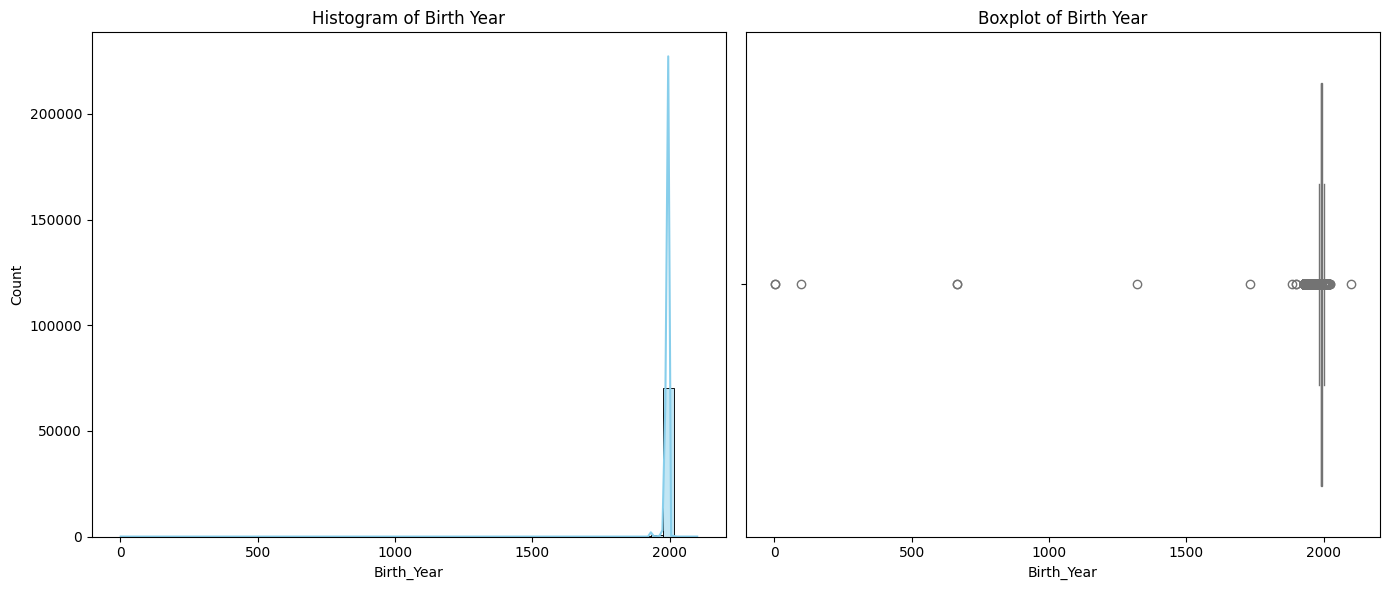

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(final_df["Birth_Year"], bins=50, kde=True, color='skyblue')
plt.title("Histogram of Birth Year")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=final_df["Birth_Year"], color='lightgreen')
plt.title("Boxplot of Birth Year")

plt.tight_layout()
plt.show()


In [69]:
Q1 = final_df["Birth_Year"].quantile(0.25)
Q3 = final_df["Birth_Year"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = final_df[(final_df["Birth_Year"] < lower_bound) | (final_df["Birth_Year"] > upper_bound)]
print("Number of outliers:", len(outliers))


Number of outliers: 2779


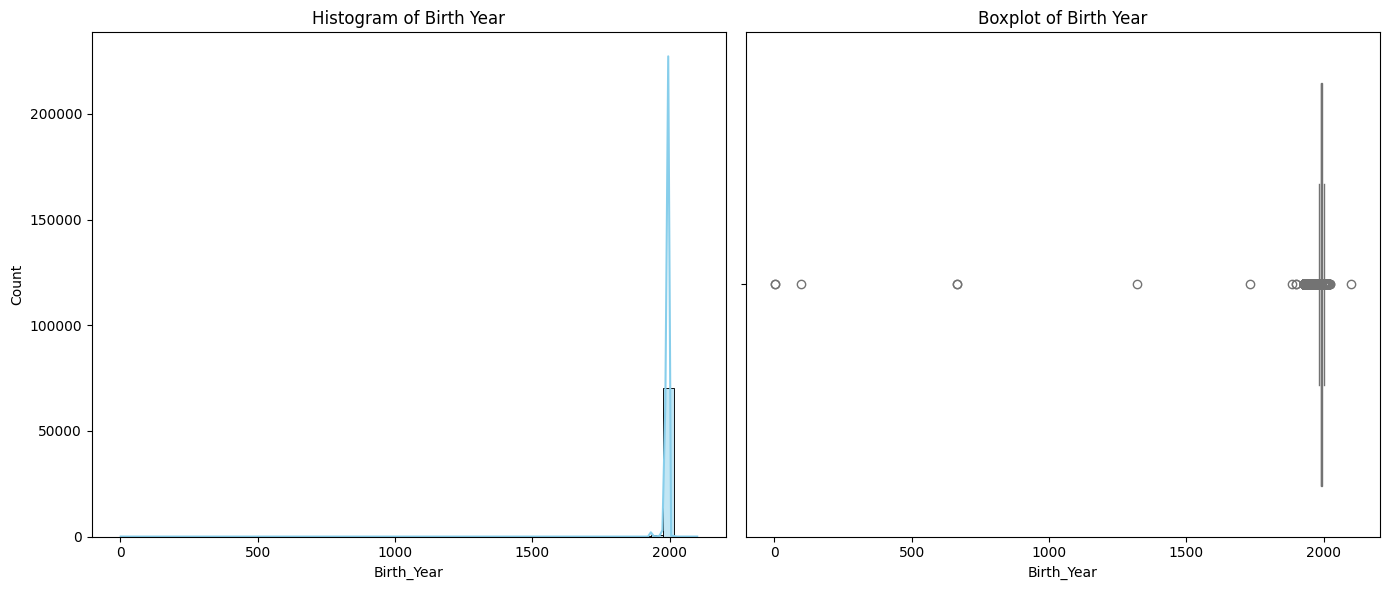

Birth_Year
1       2
97      1
666     2
1321    1
1730    1
       ..
2020    2
2021    1
2023    1
2024    1
2100    1
Name: count, Length: 81, dtype: int64

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data simulation based on describe output
# Generating synthetic data that roughly matches the summary statistics
import numpy as np
np.random.seed(0)
birth_years = np.random.normal(loc=1988.37, scale=14.77, size=23900).astype(int)

# Adding outlier values like 1 and 2023 manually to match describe
birth_years = np.append(birth_years, [1]*15 + [2023]*15)

# Create DataFrame
# Plotting
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(final_df["Birth_Year"], bins=50, kde=True, color='skyblue')
plt.title("Histogram of Birth Year")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=final_df["Birth_Year"], color='lightgreen')
plt.title("Boxplot of Birth Year")

plt.tight_layout()
plt.show()

# Outlier detection using IQR
Q1 = final_df["Birth_Year"].quantile(0.25)
Q3 = final_df["Birth_Year"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = final_df[(final_df["Birth_Year"] < lower_bound) | (final_df["Birth_Year"] > upper_bound)]
outlier_values = outliers["Birth_Year"].value_counts().sort_index()

outlier_values



In [71]:
# Define valid range
valid_min = 1945
valid_max = 2023

# Compute median of Birth_Year
median_year = final_df["Birth_Year"].median()
print(median_year)
# Replace out-of-range values with median
final_df["Birth_Year"] = final_df["Birth_Year"].apply(
    lambda x: median_year if x < valid_min or x > valid_max else x
)

# Check updated distribution and ensure no outliers beyond the fixed range
updated_outlier_values = final_df[(final_df["Birth_Year"] < valid_min) | (final_df["Birth_Year"] > valid_max)]
final_df["Birth_Year"].describe(), updated_outlier_values["Birth_Year"].value_counts()

1991.0


(count    71278.000000
 mean      1990.829260
 std          4.558441
 min       1945.000000
 25%       1989.000000
 50%       1991.000000
 75%       1994.000000
 max       2023.000000
 Name: Birth_Year, dtype: float64,
 Series([], Name: count, dtype: int64))

In [72]:
# final_df["Age"] = 2025 - final_df["Birth_Year"]


In [73]:
# # 1. Apply viewer category based on age
# def categorize_viewer(age):
#     if age >= 50:
#         return "Classic_Era_Fans"
#     elif 35 <= age < 50:
#         return "Retro_Anime_Lovers"
#     elif 25 <= age < 35:
#         return "Millennial_Favorites"
#     elif 15 <= age < 25:
#         return "Zoomer_Picks"
#     else:
#         return "Gen_Alpha_Viewers"

# final_df["Viewer_Category"] = final_df["Age"].apply(categorize_viewer)

# # 2. Drop any previous duplicate viewer category columns if present
# final_df = final_df.drop(columns=[col for col in final_df.columns if col in ['Viewer_Category_x', 'Viewer_Category_y']], errors='ignore')

# # 3. Ensure 'user_id' is in final_df for merging
# if 'user_id' not in final_df.columns:
#     final_df["user_id"] = user_final_df["user_id"].values

# # 4. Merge only if Viewer_Category not already in user_final_df
# if 'Viewer_Category' not in user_final_df.columns:
#     final_df = pd.merge(user_final_df, final_df[["user_id", "Viewer_Category"]], on="user_id", how="left")
# else:
#     final_df = user_final_df.copy()

# # 5. Add one-hot encoded categories, avoiding duplicates
# viewer_dummies = pd.get_dummies(final_df["Viewer_Category"], prefix="Category")

# # Remove any existing dummy columns to avoid duplication
# final_df = final_df.drop(columns=[col for col in viewer_dummies.columns if col in final_df.columns], errors='ignore')

# # Concatenate new dummies
# final_df = pd.concat([final_df, viewer_dummies], axis=1)


In [74]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class UserAgeCategoryTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer that creates age-based viewer categories and adds one-hot encoded columns.
    
    Parameters:
    -----------
    birth_year_col : str, default='Birth_Year'
        Column containing birth years
    current_year : int, default=2025
        Reference year for age calculation
    age_col : str, default='Age'
        Name of the generated age column
    category_col : str, default='Viewer_Category'
        Name of the generated category column
    category_prefix : str, default='Category_'
        Prefix for one-hot encoded category columns
    user_id_col : str, default='user_id'
        Column containing user IDs
    drop_original_category : bool, default=False
        Whether to drop the original category column after encoding
    age_bins : list or None, default=None
        Custom age thresholds (ascending order)
    age_labels : list or None, default=None
        Custom category labels (corresponding to age_bins)
    force_int_dummies : bool, default=True
        Force dummy columns to be integers (not booleans)
    """
    
    def __init__(self, birth_year_col='Birth_Year', current_year=2025, age_col='Age',
                 category_col='Viewer_Category', category_prefix='Category_',
                 user_id_col='user_id', drop_original_category=False, 
                 age_bins=None, age_labels=None, force_int_dummies=True):
        self.birth_year_col = birth_year_col
        self.current_year = current_year
        self.age_col = age_col
        self.category_col = category_col
        self.category_prefix = category_prefix
        self.user_id_col = user_id_col
        self.drop_original_category = drop_original_category
        self.age_bins = age_bins
        self.age_labels = age_labels
        self.force_int_dummies = force_int_dummies
        self.categories_ = None
        
    def _categorize_age(self, age):
        """Default categorization function if custom bins aren't provided"""
        if age >= 50:
            return "Classic_Era_Fans"
        elif 35 <= age < 50:
            return "Retro_Anime_Lovers"
        elif 25 <= age < 35:
            return "Millennial_Favorites"
        elif 15 <= age < 25:
            return "Zoomer_Picks"
        else:
            return "Gen_Alpha_Viewers"
    
    def fit(self, X, y=None):
        """
        Fit the transformer by learning the possible categories.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame with birth year column
        """
        # Calculate age using the provided formula
        ages = self.current_year - X[self.birth_year_col]
        
        # Get all possible categories
        if self.age_bins is not None and self.age_labels is not None:
            # Use custom bins and labels
            pd.cut(ages, bins=self.age_bins, labels=self.age_labels)
            self.categories_ = self.age_labels
        else:
            # Use default categorization function
            categories = ages.apply(self._categorize_age).unique()
            self.categories_ = sorted(categories)
        
        return self
    
    def transform(self, X):
        """
        Transform the input data by adding age, category, and one-hot encoded columns.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame with birth year column
            
        Returns:
        --------
        pandas.DataFrame
            Transformed DataFrame with added columns
        """
        X_result = X.copy()
        
        # 1. Calculate age
        X_result[self.age_col] = self.current_year - X_result[self.birth_year_col]
        
        # 2. Assign viewer categories based on age
        if self.age_bins is not None and self.age_labels is not None:
            X_result[self.category_col] = pd.cut(
                X_result[self.age_col], 
                bins=self.age_bins, 
                labels=self.age_labels
            )
        else:
            X_result[self.category_col] = X_result[self.age_col].apply(self._categorize_age)
        
        # 3. Clean up existing category columns to avoid duplicates
        duplicate_cols = [col for col in X_result.columns if col.startswith(f"{self.category_prefix}")]
        X_result = X_result.drop(columns=duplicate_cols, errors='ignore')
        
        # 4. Generate dummies
        viewer_dummies = pd.get_dummies(X_result[self.category_col], prefix=self.category_prefix)
        
        # 5. Convert dummies to int if requested
        if self.force_int_dummies:
            viewer_dummies = viewer_dummies.astype(int)
        
        # 6. Concatenate dummies with the result DataFrame
        X_result = pd.concat([X_result, viewer_dummies], axis=1)
        
        # 7. Drop original category column if requested
        if self.drop_original_category:
            X_result = X_result.drop(columns=[self.category_col])
        
        return X_result

In [75]:
# Initialize with custom bins and labels
custom_transformer = UserAgeCategoryTransformer(
    age_bins=[0, 15, 25, 35, 50, 120],  # Upper bound inclusive
    age_labels=["Gen_Alpha", "Zoomers", "Millennials", "Gen_X", "Boomers_Plus"],
    category_prefix="Age_Group_"
)

# Apply the transformation
final_df = custom_transformer.fit_transform(user_final_df)

In [76]:
final_df.columns


Index(['user_id', 'Username', 'Gender', 'Birth_Year', 'Mean Score',
       'Completed', 'avg_Action', 'avg_Adventure', 'avg_Avant Garde',
       'avg_Award Winning', 'avg_Boys Love', 'avg_Comedy', 'avg_Drama',
       'avg_Ecchi', 'avg_Erotica', 'avg_Fantasy', 'avg_Girls Love',
       'avg_Gourmet', 'avg_Hentai', 'avg_Horror', 'avg_Mystery', 'avg_Romance',
       'avg_Sci-Fi', 'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural',
       'avg_Suspense', 'Age', 'Viewer_Category', 'Age_Group__Gen_Alpha',
       'Age_Group__Zoomers', 'Age_Group__Millennials', 'Age_Group__Gen_X',
       'Age_Group__Boomers_Plus'],
      dtype='object')

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class UserAgeCategoryTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer that creates age-based viewer categories, adds one-hot encoded columns,
    and optionally removes the birth year column.
    
    Parameters:
    -----------
    birth_year_col : str, default='Birth_Year'
        Column containing birth years
    current_year : int, default=2025
        Reference year for age calculation
    age_col : str, default='Age'
        Name of the generated age column
    category_col : str, default='Viewer_Category'
        Name of the generated category column
    category_prefix : str, default='Category_'
        Prefix for one-hot encoded category columns
    user_id_col : str, default='user_id'
        Column containing user IDs
    drop_birth_year : bool, default=True
        Whether to remove the birth year column after transformation
    drop_original_category : bool, default=False
        Whether to drop the original category column after encoding
    age_bins : list or None, default=None
        Custom age thresholds (ascending order)
    age_labels : list or None, default=None
        Custom category labels (corresponding to age_bins)
    force_int_dummies : bool, default=True
        Force dummy columns to be integers (not booleans)
    """
    
    def __init__(self, birth_year_col='Birth_Year', current_year=2025, age_col='Age',
                 category_col='Viewer_Category', category_prefix='Category_',
                 user_id_col='user_id', drop_birth_year=True, drop_original_category=False, 
                 age_bins=None, age_labels=None, force_int_dummies=True):
        self.birth_year_col = birth_year_col
        self.current_year = current_year
        self.age_col = age_col
        self.category_col = category_col
        self.category_prefix = category_prefix
        self.user_id_col = user_id_col
        self.drop_birth_year = drop_birth_year
        self.drop_original_category = drop_original_category
        self.age_bins = age_bins
        self.age_labels = age_labels
        self.force_int_dummies = force_int_dummies
        self.categories_ = None
        
    def _categorize_age(self, age):
        """Default categorization function if custom bins aren't provided"""
        if age >= 50:
            return "Classic_Era_Fans"
        elif 35 <= age < 50:
            return "Retro_Anime_Lovers"
        elif 25 <= age < 35:
            return "Millennial_Favorites"
        elif 15 <= age < 25:
            return "Zoomer_Picks"
        else:
            return "Gen_Alpha_Viewers"
    
    def fit(self, X, y=None):
        """
        Fit the transformer by learning the possible categories.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame with birth year column
        """
        # Calculate age using the provided formula
        ages = self.current_year - X[self.birth_year_col]
        
        # Get all possible categories
        if self.age_bins is not None and self.age_labels is not None:
            # Use custom bins and labels
            pd.cut(ages, bins=self.age_bins, labels=self.age_labels)
            self.categories_ = self.age_labels
        else:
            # Use default categorization function
            categories = ages.apply(self._categorize_age).unique()
            self.categories_ = sorted(categories)
        
        return self
    
    def transform(self, X):
        """
        Transform the input data by adding age, category, and one-hot encoded columns.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame with birth year column
            
        Returns:
        --------
        pandas.DataFrame
            Transformed DataFrame with added columns and optionally removed birth year
        """
        X_result = X.copy()
        
        # 1. Calculate age
        X_result[self.age_col] = self.current_year - X_result[self.birth_year_col]
        
        # 2. Assign viewer categories based on age
        if self.age_bins is not None and self.age_labels is not None:
            X_result[self.category_col] = pd.cut(
                X_result[self.age_col], 
                bins=self.age_bins, 
                labels=self.age_labels
            )
        else:
            X_result[self.category_col] = X_result[self.age_col].apply(self._categorize_age)
        
        # 3. Clean up existing category columns to avoid duplicates
        duplicate_cols = [col for col in X_result.columns if col.startswith(f"{self.category_prefix}")]
        X_result = X_result.drop(columns=duplicate_cols, errors='ignore')
        
        # 4. Generate dummies
        viewer_dummies = pd.get_dummies(X_result[self.category_col], prefix=self.category_prefix)
        
        # 5. Convert dummies to int if requested
        if self.force_int_dummies:
            viewer_dummies = viewer_dummies.astype(int)
        
        # 6. Concatenate dummies with the result DataFrame
        X_result = pd.concat([X_result, viewer_dummies], axis=1)
        
        # 7. Drop original category column if requested
        if self.drop_original_category:
            X_result = X_result.drop(columns=[self.category_col])
            
        # 8. Drop birth year column if requested
        if self.drop_birth_year:
            X_result = X_result.drop(columns=[self.birth_year_col])
        
        return X_result


In [78]:
# Initialize the transformer with Birth_Year removal
age_transformer = UserAgeCategoryTransformer(
    age_bins=[0, 15, 25, 35, 50, 120],  
    age_labels=["Gen_Alpha", "Zoomers", "Millennials", "Gen_X", "Boomers_Plus"],
    category_prefix="Age_Group_",
    drop_birth_year=True  # This will ensure Birth_Year is removed
)

# Apply transformation
final_df = age_transformer.fit_transform(user_final_df)

print(f"Birth_Year column included: {'Birth_Year' in final_df.columns}")
print(f"Age column included: {'Age' in final_df.columns}")
print(f"Viewer categories included: {[col for col in final_df.columns if col.startswith('Age_Group_')]}")


Birth_Year column included: False
Age column included: True
Viewer categories included: ['Age_Group__Gen_Alpha', 'Age_Group__Zoomers', 'Age_Group__Millennials', 'Age_Group__Gen_X', 'Age_Group__Boomers_Plus']


In [79]:
final_df.sample(5)

,user_id,Username,Gender,Mean Score,Completed,avg_Action,avg_Adventure,avg_Avant Garde,avg_Award Winning,avg_Boys Love,...,avg_Sports,avg_Supernatural,avg_Suspense,Age,Viewer_Category,Age_Group__Gen_Alpha,Age_Group__Zoomers,Age_Group__Millennials,Age_Group__Gen_X,Age_Group__Boomers_Plus
64681,1104833,TheFurnaceMaster,Male,8.05,749.0,8.23,8.21,7.93,8.40,7.06,...,8.30,8.33,8.33,28,Millennials,0,0,1,0,0
13748,66878,outlawblue,Female,7.30,335.0,7.44,7.21,7.80,7.94,7.50,...,7.00,7.72,7.60,38,Gen_X,0,0,0,1,0
3019,14845,deadxtree,Female,7.11,35.0,7.71,7.38,5.50,8.29,6.25,...,7.78,7.15,8.00,34,Millennials,0,0,1,0,0
48409,467334,kristi9,Female,7.80,347.0,7.72,8.00,9.00,8.48,7.06,...,8.11,7.92,8.53,34,Millennials,0,0,1,0,0
23529,118138,Dwim,Male,7.48,43.0,7.67,8.21,9.33,7.62,7.06,...,5.50,7.17,7.67,35,Millennials,0,0,1,0,0


In [80]:
final_df.info()
final_df.to_csv("Final_User_Dataset.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71278 entries, 0 to 71277
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   user_id                  71278 non-null  int64   
 1   Username                 71278 non-null  object  
 2   Gender                   71278 non-null  object  
 3   Mean Score               71278 non-null  float64 
 4   Completed                71278 non-null  float64 
 5   avg_Action               71278 non-null  float64 
 6   avg_Adventure            71278 non-null  float64 
 7   avg_Avant Garde          71278 non-null  float64 
 8   avg_Award Winning        71278 non-null  float64 
 9   avg_Boys Love            71278 non-null  float64 
 10  avg_Comedy               71278 non-null  float64 
 11  avg_Drama                71278 non-null  float64 
 12  avg_Ecchi                71278 non-null  float64 
 13  avg_Erotica              71278 non-null  float64 
 14  avg_Fa

In [81]:
final_df.columns

Index(['user_id', 'Username', 'Gender', 'Mean Score', 'Completed',
       'avg_Action', 'avg_Adventure', 'avg_Avant Garde', 'avg_Award Winning',
       'avg_Boys Love', 'avg_Comedy', 'avg_Drama', 'avg_Ecchi', 'avg_Erotica',
       'avg_Fantasy', 'avg_Girls Love', 'avg_Gourmet', 'avg_Hentai',
       'avg_Horror', 'avg_Mystery', 'avg_Romance', 'avg_Sci-Fi',
       'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural', 'avg_Suspense',
       'Age', 'Viewer_Category', 'Age_Group__Gen_Alpha', 'Age_Group__Zoomers',
       'Age_Group__Millennials', 'Age_Group__Gen_X',
       'Age_Group__Boomers_Plus'],
      dtype='object')

In [82]:
def convert_bool_to_int(df, columns):
    """
    Converts boolean values in the specified columns of a DataFrame to integers.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to convert.

    Returns:
    pd.DataFrame: The updated DataFrame with specified columns converted.
    """
    df[columns] = df[columns].astype(int)
    return df

In [83]:
# Check if the required columns exist in final_df
required_columns = ['Category_Classic_Era_Fans', 'Category_Gen_Alpha_Viewers', 
                    'Category_Millennial_Favorites', 'Category_Retro_Anime_Lovers', 
                    'Category_Zoomer_Picks']

missing_columns = [col for col in required_columns if col not in final_df.columns]

# If any columns are missing, create them with default values (e.g., 0)
for col in missing_columns:
    final_df[col] = 0

# Convert the columns to integers
final_df[required_columns] = final_df[required_columns].astype(int)

In [84]:
final_df.shape

(71278, 38)

In [85]:
final_df.columns

Index(['user_id', 'Username', 'Gender', 'Mean Score', 'Completed',
       'avg_Action', 'avg_Adventure', 'avg_Avant Garde', 'avg_Award Winning',
       'avg_Boys Love', 'avg_Comedy', 'avg_Drama', 'avg_Ecchi', 'avg_Erotica',
       'avg_Fantasy', 'avg_Girls Love', 'avg_Gourmet', 'avg_Hentai',
       'avg_Horror', 'avg_Mystery', 'avg_Romance', 'avg_Sci-Fi',
       'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural', 'avg_Suspense',
       'Age', 'Viewer_Category', 'Age_Group__Gen_Alpha', 'Age_Group__Zoomers',
       'Age_Group__Millennials', 'Age_Group__Gen_X', 'Age_Group__Boomers_Plus',
       'Category_Classic_Era_Fans', 'Category_Gen_Alpha_Viewers',
       'Category_Millennial_Favorites', 'Category_Retro_Anime_Lovers',
       'Category_Zoomer_Picks'],
      dtype='object')

In [86]:
final_df.head()

,user_id,Username,Gender,Mean Score,Completed,avg_Action,avg_Adventure,avg_Avant Garde,avg_Award Winning,avg_Boys Love,...,Age_Group__Gen_Alpha,Age_Group__Zoomers,Age_Group__Millennials,Age_Group__Gen_X,Age_Group__Boomers_Plus,Category_Classic_Era_Fans,Category_Gen_Alpha_Viewers,Category_Millennial_Favorites,Category_Retro_Anime_Lovers,Category_Zoomer_Picks
0,1,Xinil,Male,7.37,233.0,7.68,7.90,8.00,8.18,7.06,...,0,0,0,1,0,0,0,0,0,0
1,20,vondur,Male,8.06,94.0,8.02,8.24,9.00,8.43,7.06,...,0,0,0,1,0,0,0,0,0,0
2,66,Hiromi,Male,7.53,148.0,7.49,7.31,7.00,7.90,7.06,...,0,0,1,0,0,0,0,0,0,0
3,82,Achtor,Male,7.17,153.0,7.36,7.71,8.80,8.25,7.06,...,0,0,0,1,0,0,0,0,0,0
4,112,luffykun,Male,8.77,125.0,8.60,8.36,7.93,9.80,7.06,...,0,0,0,1,0,0,0,0,0,0


In [87]:
final_df.to_csv("Final_User_Dataset.csv",index=False)